In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
def plot_origin(matrix):
    return(np.zeros(len(matrix)))

In [3]:
def angle(p_vec, x = None):
    """Computes the angle that the principle axis in an ellipse makes relative to another vector x (x=(1, 0)* is default), i.e., the rotation angle of the ellipse.

    Args:
        p_vec (arr): a numpy vector giving the direction of the principle axis of the ellipse
    """
    # # If the vector is in Q3, reflect to Q1
    if ((p_vec[0] < 0) and (p_vec[1] < 0)):
        p_vec = -1 * p_vec
    
    # If the vector is in Q4, reflect to Q2
    if ((p_vec[0] > 0) and (p_vec[1] < 0)):
        p_vec = -1 * p_vec

    x = np.array([1, 0]) # Set default comparison vector as x-axis
    inner = p_vec @ x # Compute inner product
    norms = np.linalg.norm(p_vec) * np.linalg.norm(x) # Compute norms
    cos = inner / norms # Compute cos of angle between x and p_vec
    return np.arccos(np.clip(cos, -1.0, 1.0))

In [4]:
# Test ellipse_angle function
print(angle(np.array([1, -1])))
print(angle(np.array([-1, -1])))
print(angle(np.array([-1, 1])))
print(angle(np.array([1, 1])))
print(angle(np.array([0, 1])))
print(angle(np.array([1, 0])))
print(angle(np.array([-1, 0])))
print(angle(np.array([0, -1])))

2.356194490192345
0.7853981633974484
2.356194490192345
0.7853981633974484
1.5707963267948966
0.0
3.141592653589793
1.5707963267948966


In [5]:
def plot_svd(A):
    """Function takes a 2x2 matrix A, computes the SVD of A, and then plots the vectors u_1, u_2, v_1, and v_2 along with the appropriate ellipse for the underlying space.

    Args:
        A (arr): 2 x 2 array of floats
    """
    # Check that the provided matrix is 2 x 2 or less and complain if it is not
    assert len(A) <= 2

    # Compute the SVD of the matrix A and store the results
    u, sig, vh = np.linalg.svd(A)
    
    # Compute U from u
    U = np.zeros((len(A), len(A)))
    U[:, 0] = sig[0] * u[:, 0]
    U[:, 1] = sig[1] * u[:, 1]

    # Define origin for U and vh vectors
    U_origin = np.zeros((len(U), len(U)))
    vh_origin = np.zeros((len(vh), len(vh)))

    # Define angles of principle axes for U and vh
    U_angle = angle(U[:, 0])
    vh_angle = angle(vh[:, 0])
    
    # Define plot canvas
    fig, ax = plt.subplots(2, 1, figsize=(5, 10))
    
    # Set axis limits
    U_lim = max([np.abs(U[0, 0]), np.abs(U[1, 0])])
    vh_lim = 1
    ax[0].set_xlim(-U_lim - 0.5, U_lim + 0.5)
    ax[0].set_ylim(-U_lim - 0.5, U_lim + 0.5)
    ax[1].set_xlim(-vh_lim - 0.5, vh_lim + 0.5)
    ax[1].set_ylim(-vh_lim - 0.5, vh_lim + 0.5)
    
    # Define plot Titles
    ax[0].set_title("Principle Axes of U")
    ax[1].set_title("Principle Axes vh")

    # Plot vectors
    ax[0].quiver(*U_origin, U[0, :], U[1, :], angles='xy', scale_units='xy', scale=1, width=.004)
    ax[1].quiver(*vh_origin, vh[0, :], vh[1, :], angles='xy', scale_units='xy', scale=1, width=.004)
    
    # Plot ellipses
    U_ellipse = Ellipse(
        (0, 0),
        width=2 * sig[0],
        height=2 * sig[1],
        angle=U_angle * (180/np.pi),
        zorder=0,
        fill=False
    )
    ax[0].add_patch(U_ellipse)
    
    vh_ellipse = Ellipse(
        (0, 0),
        width=2,
        height=2,
        angle=vh_angle * (180/np.pi),
        zorder=0,
        fill=False
    )
    ax[1].add_patch(vh_ellipse)

    plt.show()

    #return U, vh

        

In [6]:
A = np.array([[5, 2], [3, 4]])

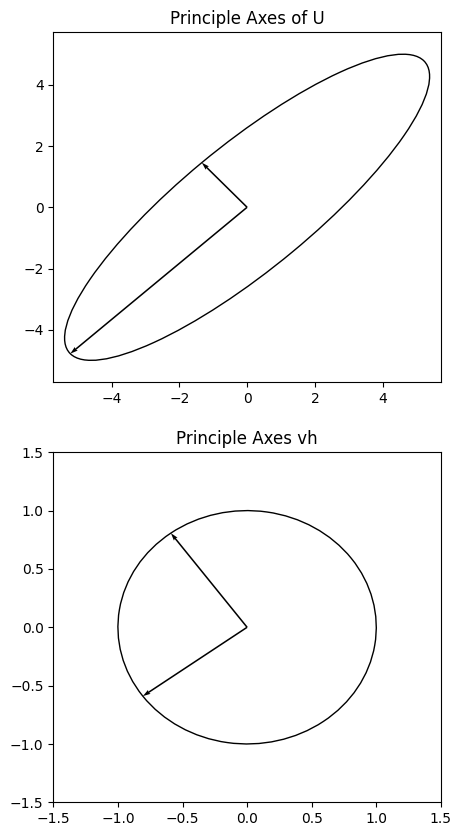

In [7]:
plot_svd(A)

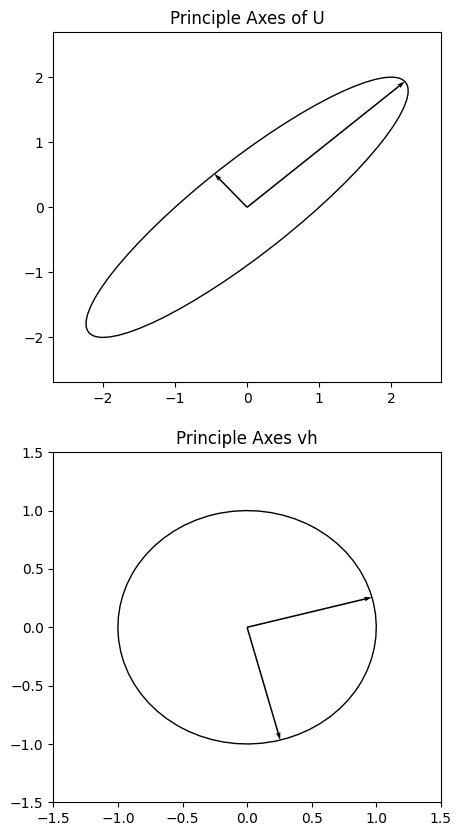

In [8]:
A_37 = np.array([[1, 2], [0, 2]])
plot_svd(A_37)

In [9]:
A_41_a = np.array([[3, 0], [0, -2]])
A_41_b = np.array([[2, 0], [0, 3]])
A_41_d = np.array([[1, 1], [0, 0]])
A_41_e = np.array([[1, 1], [1, 1]])

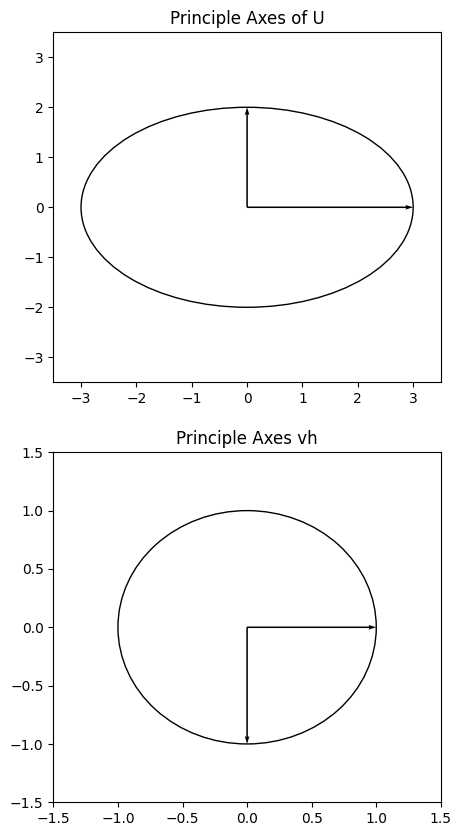

In [10]:
plot_svd(A_41_a)

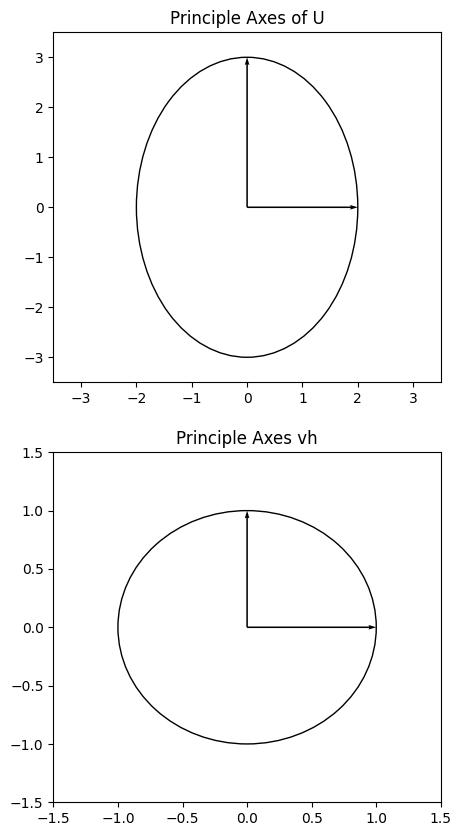

In [11]:
plot_svd(A_41_b)

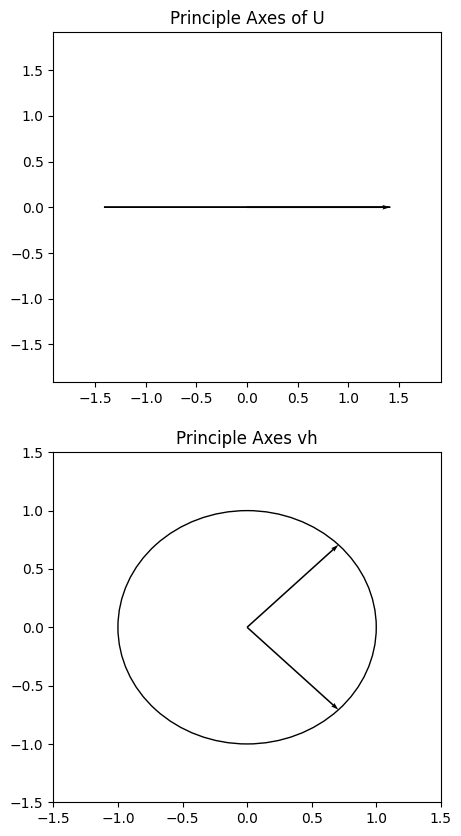

In [12]:
plot_svd(A_41_d)

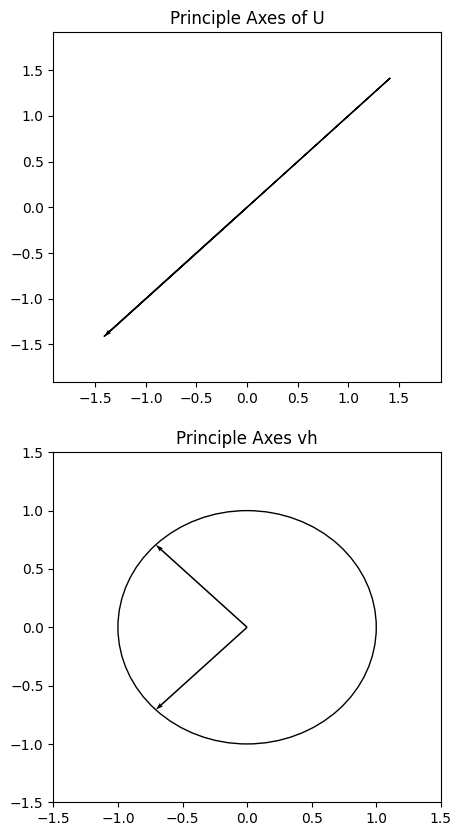

In [13]:
plot_svd(A_41_e)